#### Ε.Μ.Π. Σχολή Η.Μ.& Μ.Υ. Ψηφιακή Επεξεργασία Σημάτων Ακαδ.Ετος 2019-2020
                        2η Εργαστηριακή Άσκηση  

##### Επεξεργασία και Κατηγοριοποίηση Σημάτων Φυσιολογίας και Κίνησης από Φορητούς Αισθητήρες

Η εργασία παραδίδεται από τους φοιτητές:
    
* **Γαρδέλη Παναγιώτη          ΑΜ: 03117008**
* **Τσιγγέλης Κωνσταντίνος     ΑΜ: 03117149**

##### Η αναφορά είναι αυτή και περιέχει και τον κώδικα. Οι απαντήσεις στα ερωτήματα της αναφοράς βρίσκονται κάτω από το εκάστοτε πλαίσιο κώδικα σε μορφή Markdown.

###### Μέρος 1ο - Υπολογισμός Ενέργειας Βραχέος Χρόνου και Μετ/σμού Fourier Βραχέος Χρόνου (STFT) σε σήματα κίνησης και καρδιακού ρυθμού

1.1

In [146]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import librosa.output as lb
import librosa as lb
import pywt
import scipy
import math
import statistics

In [147]:
step00=np.load('step_00.npz')
step00.files #see if it works

['acc', 'gyr', 'hrm']

<function matplotlib.pyplot.show(*args, **kw)>

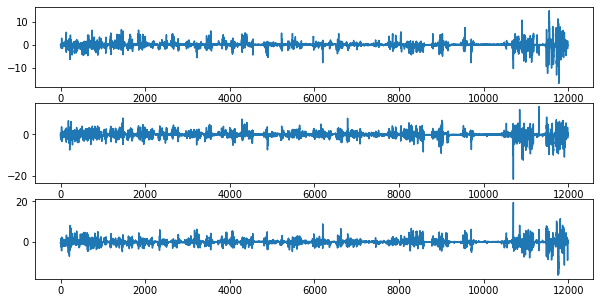

In [148]:
#n=np.linspace(0,1023,1024)
n=np.linspace(0,11991,11992)
acc=step00['acc']
accx=[] #x axis
accy=[] #y
accz=[] #z
plt.figure(figsize=(10,5)) #make it more visible

for i in range(len(acc)):
    accx.append(acc[i][0])
        
for i in range(len(acc)):
    accy.append(acc[i][1])
        
for i in range(len(acc)):
    accz.append(acc[i][2])

plt.subplot(3,1,1)
plt.plot(accx)
plt.show
plt.subplot(3,1,2)
plt.plot(accy)
plt.show
plt.subplot(3,1,3)
plt.plot(accz)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

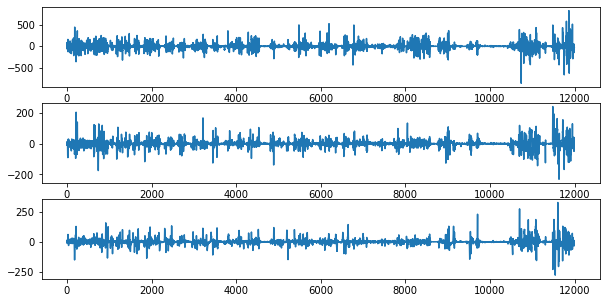

In [149]:
gyr=step00['gyr']
gyrx=[]
gyry=[]
gyrz=[]
plt.figure(figsize=(10,5)) #make it more visible

for i in range(len(gyr)):
    gyrx.append(gyr[i][0])
        
for i in range(len(gyr)):
    gyry.append(gyr[i][1])
        
for i in range(len(gyr)):
    gyrz.append(gyr[i][2])

plt.subplot(3,1,1)
plt.plot(gyrx)
plt.show
plt.subplot(3,1,2)
plt.plot(gyry)
plt.show
plt.subplot(3,1,3)
plt.plot(gyrz)
plt.show

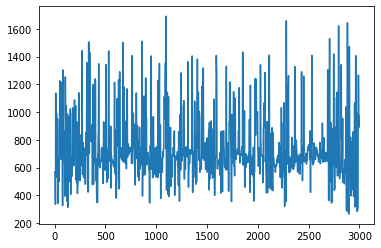

In [150]:
hrm=step00['hrm']
plt.plot(hrm)

1.2

In [151]:
def ste(signal, frequency): #just like 1st lab Exercise 3.1
    window_length=20*frequency
    hamming_window=np.hamming(window_length)
    squared_signal=[i**2 for i in signal]
    Energy=np.convolve(hamming_window, squared_signal, mode='same')
    return Energy

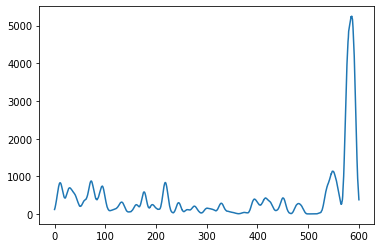

In [152]:
time_acc_gyr=np.linspace(0,600,11992)
accx=[]
for i in range(len(acc)):
    accx.append(acc[i][0]) #x axis
E=ste(accx, 20)
plt.plot(time_acc_gyr, E)

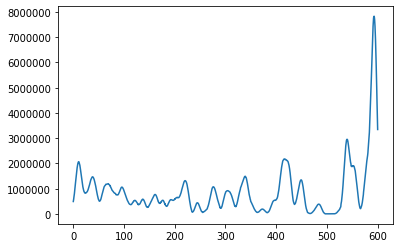

In [153]:
gyrx=[]
for i in range(len(gyr)):
    gyrx.append(gyr[i][0]) #x axis
E=ste(gyrx, 20)
plt.plot(time_acc_gyr, E)
plt.show()

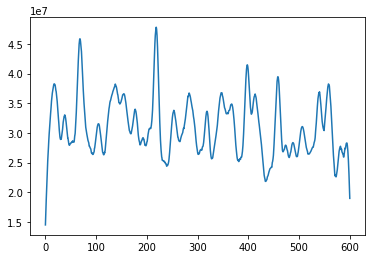

In [154]:
time_hrm=np.linspace(0,600,2998)
E=ste(hrm,5)
plt.plot(time_hrm,E)
plt.show()

1.3

In [155]:
stft_acc=lb.core.stft(np.array(accx), 2048, 200, 400) #window_len=20 sec, f=20Hz, #hop_length=10 sec
print(stft_acc.shape) #so we know the shape
#can also do shape=np.shape(stft_acc)
#t=np.linspace(0,600,shape[1])
#f=np.linspace(0,2.5,b[0])

(1025, 60)


Text(0.5, 1.0, 'STFT of the acc signal')

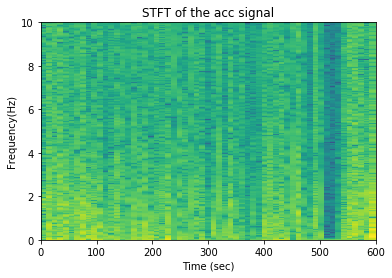

In [156]:
t=np.linspace(0,600,60) #22050 is the default librosa sample rate
f=np.linspace(0,10,1025) 
plt.pcolormesh(t,f,np.log(abs(stft_acc)))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT of the acc signal')

In [157]:
stft_hrm=lb.core.stft(np.array(hrm), 2048, 50, 100) #window_len=20 sec, f=5Hz
print(stft_hrm.shape) #so we know the shape
#can also do shape=np.shape(stft_hrm)
#t=np.linspace(0,600,shape[1])
#f=np.linspace(0,2.5,b[0])

(1025, 60)


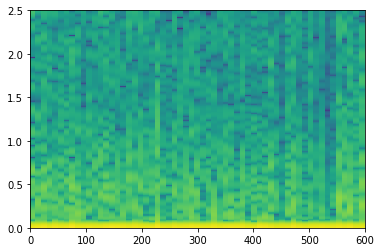

In [158]:
t=np.linspace(0,600,60)
f=np.linspace(0,2.5,1025)
plt.pcolormesh(t,f,np.log(abs(stft_hrm)))
plt.show()

1.4

In [159]:
def characteristics(signal):
    out=np.empty(4)
    out[0]=statistics.mean(signal)
    out[1]=min(signal)
    out[2]=max(signal)
    out[3]=np.std(signal) #standard deviation
    return out

In [160]:
sleep03=np.load('sleep_03.npz')
step03=np.load('step_03.npz')

In [161]:
print('The characteristiccs of the step file are')
for i in range(3):
    print(characteristics(step03['acc'][:,i])) #x,y,z
    print(characteristics(step03['gyr'][:,i])) #x,y,z
print(characteristics(step03['hrm']))

print('\nAnd the characteristics of the sleep file are')

for i in range(3):
    print(characteristics(sleep03['acc'][:,i])) 
    print(characteristics(sleep03['gyr'][:,i]))
print(characteristics(sleep03['hrm']))

The characteristiccs of the step file are
[  0.1669718  -16.008503    19.136139     2.28792751]
[  -1.13271348 -700.419983    774.409973     72.23342036]
[ -0.0607571  -23.154367     9.332275     1.89742519]
[   0.89327051 -229.600006    264.600006     31.30729253]
[ -0.11641182 -14.338249    17.983849     1.72611534]
[-2.79287860e-01 -3.02610016e+02  3.33480011e+02  3.25393732e+01]
[ 727.17444963  253.         1695.          266.38269666]

And the characteristics of the sleep file are
[ 0.09329085 -3.041865    1.615079    0.09811331]
[ -0.14024516 -64.190002    63.07         2.53665628]
[-0.02821571 -1.475118    1.292412    0.07169526]
[-7.96781196e-03 -1.30900000e+01  1.63099990e+01  7.31871154e-01]
[ 0.08429509 -1.084162    4.296247    0.10871187]
[ -0.03930203 -18.059999    18.200001     0.78316416]
[1016.63142095  648.         1590.          100.55028997]


Φαίνεται ότι τα min, max, std είναι που καθορίζουν αν ένα άτομο κοιμάται ή όχι. Πιο συγκεκριμένα, αν αυτά τα 3 έχουν χαμηλή τιμή, όπως στο sleep_03, ο άνθρωπος κοιμάται, ενώ αν έχουν μεγάλες τιμές, όπως στο step_03, είναι ξυπνιος.

###### Μέρος 2ο - Υπολογισμός τηςTeager-Kaiser Ενέργειας σε πολλαπλές ζώνες συχνοτήτων με τη χρήση Gabor filterbank

2.1

In [162]:
step00=np.load('step_00.npz')
step00.files #see if it works

['acc', 'gyr', 'hrm']

2.2

In [163]:
def teo(signal): 
    squared_signal=[i**2 for i in signal[1:len(signal)-1]]
    signal_n_minus_1=signal[:len(signal)-2]   #x[n-1]
    signal_n_plus_1=signal[1:len(signal)-1]  #x[n+1]
    product=np.multiply(signal_n_minus_1, signal_n_plus_1) #x[n-1]*x[n+1]
    y=np.subtract(squared_signal, product)
    y=np.concatenate(([0],y)) #oriakes times
    y=np.append(y,signal[len(signal)-1])
    return y

2.3

In [164]:
def gaborfilt(signal,fc,a,fs):
    Wc=2*np.pi*fc/fs #Ωc
    b=a/fs
    N=int((3/b)+1) #if we don't use int here, we get float error at the next block
    n=np.linspace(-N,N,2*N+1)  #-N<=n<=N (N--(N)+1)
    h=np.exp((-b**2)*(n**2))*np.cos(Wc*n)
    y=scipy.signal.lfilter(h,1,signal) #(coefficient ari8mhth, coefficient paronomasth, signal)
    return y

In [165]:
K=25                     #for acc and gyr
a=20/(2*K) #fs/(2K)
fcmin=a/2
fcmax=(20-a)/2
f=np.linspace(fcmin, fcmax, K)
acc=step00['acc']
gyr=step00['gyr']
acc_filt=np.empty((K,11992)) #needs two parenthesis
gyr_filt=np.empty((K,11992))
for i in range(0,K):
    acc_filt[i,:]=gaborfilt(acc[:,0],f[i],a,20)
    gyr_filt[i,:]=gaborfilt(gyr[:,0],f[i],a,20)

In [166]:
a=5/(2*K) #fs_hrm=5      #for hrm
fcmin=a/2
fcmax=(5-a)/2
f=np.linspace(fcmin, fcmax, K)
hrm=step00['hrm']
hrm_filt=np.empty((K,2998)) 
for i in range(0,K):
    hrm_filt[i,:]=gaborfilt(hrm,f[i],a,5)

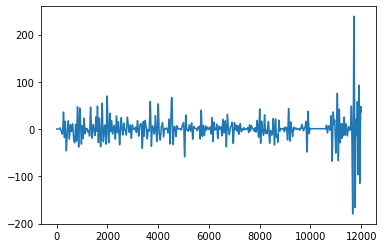

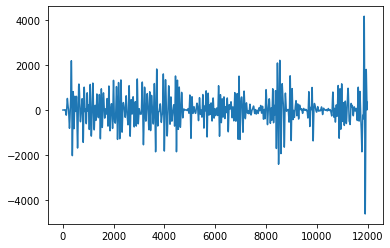

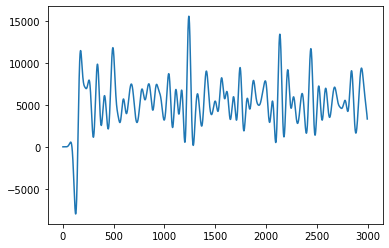

In [167]:
for i in range(0,1):
    plt.plot(acc_filt[i])
    plt.show()
    plt.plot(gyr_filt[i])
    plt.show()
    plt.plot(hrm_filt[i])
    plt.show()    

2.4

In [168]:
def binomial_filter(signal):
    return scipy.signal.lfilter([0.25,0.5,0.25],1,signal)

2.5

Για acc, gyr έχουμε 400 δείγματα και ανά 100 νέο παράθυρο, άρα N=(11992−400)/100+1=116.92 δηλαδή *Ν=117* παράθυρα. Eπίσης, κάνουμε zero padding στο τέλος του κάθε σήματος προκειμένου να έχουμε μήκος ίσο με 12000.
Ομοίως, για το hrm, έχουμε 200 δείγματα και ανά 50 νέο παράθυρο. Άρα έχουμε συνολικά N=(2998-200)/50+1=56.96 δηλαδή *Ν=57* παράθυρα.

In [169]:
accx = np.pad(acc[:,0], (0,8), 'constant') #(signal_to_pad, how many zeros, pads of const value)
gyrx= np.pad(gyr[:,0], (0,8), 'constant') #11992(acc,gyr) -> 8 zeros
hrm = np.pad(hrm, (0,2), 'constant')   #2998(hrm) -> 2 zeros

x_acc_gyr=117
y_acc_gyr=400 #samples
step_acc_gyr=100 #20*5 (fs*step)
window_acc=np.empty((x_acc_gyr,y_acc_gyr))
window_gyr=np.empty((x_acc_gyr,y_acc_gyr))
window_acc[x_acc_gyr-1,:] = accx[len(accx)-y_acc_gyr:len(accx)]*np.hamming(y_acc_gyr)
window_gyr[x_acc_gyr-1,:] = gyrx[len(gyrx)-y_acc_gyr:len(gyrx)]*np.hamming(y_acc_gyr)

k=l=0
for i in range(0, len(acc) - y_acc_gyr, step_acc_gyr):
    window_acc[k,:]=accx[i:i+y_acc_gyr]*np.hamming(y_acc_gyr)
    k=k+1
for i in range(0, len(gyr) - y_acc_gyr, step_acc_gyr):
    window_gyr[l,:]=gyrx[i:i+y_acc_gyr]*np.hamming(y_acc_gyr)
    l=l+1

x_hrm=57
y_hrm=200 #samples
step_hrm=50 #10*5 (fs*step)
window_hrm=np.empty((x_hrm,y_hrm))
window_hrm[x_hrm-1,:] = hrm[len(hrm)-y_hrm:len(hrm)]*np.hamming(y_hrm)

m=0
for i in range(0, len(hrm) - y_hrm, step_hrm):
    window_hrm[m,:]=hrm[i:i+y_hrm]*np.hamming(y_hrm)
    m=m+1
    
window_acc #these are the prints
window_gyr
window_hrm


array([[45.36      , 45.48999552, 45.87985251, ..., 87.9566132 ,
        64.50433228, 64.32      ],
       [98.        , 98.28085453, 55.58987421, ..., 41.02484167,
        40.67623938, 40.56      ],
       [31.6       , 31.69056126, 31.96215475, ..., 58.66471441,
        58.16622003, 38.56      ],
       ...,
       [29.2       , 29.28368319, 29.53464933, ..., 21.60479827,
        21.42121482, 21.36      ],
       [53.44      , 50.94558582, 51.38219814, ..., 59.1502155 ,
        58.64759564, 56.24      ],
       [62.08      , 62.25791275, 62.79147363, ..., 78.48934204,
         0.        ,  0.        ]])

2.6

In [170]:
K=25
a=20/(2*K)         #acc,gyr
fcmin=a/2
fcmax=(20-a)/2
f=np.linspace(fcmin, fcmax, K)
filtered_acc=np.empty((117,K,400))
filtered_gyr=np.empty((117,K,400))

In [171]:
for i in range(117):
    for j in range(K):
        filtered_acc[i,j,:]=gaborfilt(window_acc[i,:], f[j], a, 20)
        
for i in range(117):
    for j in range(K):
        filtered_gyr[i,j,:]=gaborfilt(window_gyr[i,:], f[j], a, 20)

In [172]:
K=25
a=5/(2*K)         #hrm
fcmin=a/2
fcmax=(5-a)/2
f=np.linspace(fcmin, fcmax, K)
filtered_hrm=np.empty((57,K,200))

In [173]:
for i in range(57):
    for j in range(K):
        filtered_hrm[i,j,:]=gaborfilt(window_hrm[i,:], f[j], a, 5)

2.7

a'

In [174]:
teo_acc=np.empty((117,K,400))
teo_gyr=np.empty((117,K,400))
teo_hrm=np.empty((57,K,200))
for i in range (K):
    for j in range(117):
        teo_acc[j,i,:]=teo(filtered_acc[j,i,:])
        teo_gyr[j,i,:]=teo(filtered_gyr[j,i,:])

for i in range (K):
    for j in range(57):
        teo_hrm[j,i,:]=teo(filtered_hrm[j,i,:])

b'

In [175]:
bin_acc=np.empty((117,K,400))
bin_gyr=np.empty((117,K,400))   #we must filter it two times in a row
bin_hrm=np.empty((57,K,200))
for i in range (K):
    for j in range(117):
        bin_acc[j,i,:] = binomial_filter(binomial_filter(teo_acc[j,i,:]))
        bin_gyr[j,i,:] = binomial_filter(binomial_filter(teo_gyr[j,i,:]))
        
for i in range (K):
    for j in range(57):
        bin_hrm[j,i,:] = binomial_filter(binomial_filter(teo_hrm[j,i,:]))

c'

In [176]:
avg_energy_acc = np.empty((117,K))    #only want the positive parts,
avg_energy_gyr = np.empty((117,K))    #avg_energy=sum_of_points_of_signal/length(signal)
avg_energy_hrm = np.empty((57,K))
for i in range (K):
    for j in range(117):
        avg_energy_acc[j,i] = sum((bin_acc[j,i,:])[bin_acc[j,i,:]>0])/len((bin_acc[j,i,:])[bin_acc[j,i,:]>0])
        avg_energy_gyr[j,i] = sum((bin_gyr[j,i,:])[bin_gyr[j,i,:]>0])/len((bin_gyr[j,i,:])[bin_gyr[j,i,:]>0])
        
for i in range (25):
    for j in range(57):        
        avg_energy_hrm[j,i] = sum((bin_hrm[j,i,:])[bin_hrm[j,i,:]>0])/len((bin_hrm[j,i,:])[bin_hrm[j,i,:]>0])

d'

In [177]:
max_avg_energy_acc = np.empty(117)
max_avg_energy_gyr = np.empty(117)
max_avg_energy_hrm = np.empty(57)
for i in range (117):
    max_avg_energy_acc[i] = max(avg_energy_acc[i,:])
    max_avg_energy_gyr[i] = max(avg_energy_gyr[i,:])
    
for i in range(57):
    max_avg_energy_hrm[i] = max(avg_energy_hrm[i,:])

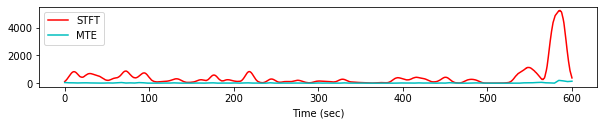

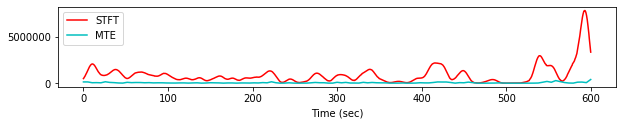

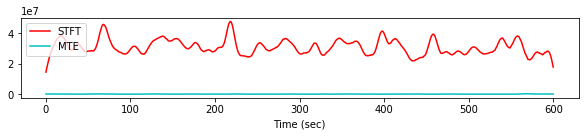

In [180]:
time_acc_gyr=np.linspace(0,600,12000)
time_hrm=np.linspace(0,600,3000)
acc_gyr_samples=np.linspace(0,600,117)
hrm_samples=np.linspace(0,600,57)
n=np.linspace(0,600,11992)

plt.figure(figsize=(10,5))
plt.subplot(311)
plt.xlabel('Time (sec)')
plt.plot(n,ste(acc[:,0],20),color='r', label = "STFT")
plt.plot(acc_gyr_samples,max_avg_energy_acc,color='c', label = "ΜΤΕ")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(312)
plt.xlabel('Time (sec)')
plt.plot(n,ste(gyr[:,0],20), color='r', label = "STFT")
plt.plot(acc_gyr_samples,max_avg_energy_gyr,color='c', label = "ΜΤΕ")
plt.legend(loc = "upper left")
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(313)
plt.xlabel('Time (sec)')
plt.plot(time_hrm,ste(hrm,5), color = 'r', label = "STFT")
plt.plot(hrm_samples,max_avg_energy_hrm, color='c', label = "ΜΤΕ")
plt.legend(loc = "upper left")
plt.show()

##### Μέρος 4ο - Αποθορυβοποίηση σημάτων κινήσης με φίλτρα Butterworth και Wiener

4.1

In [181]:
sleep01=np.load('sleep_01.npz')
sleep01.files

['acc', 'gyr', 'hrm']

In [204]:
acc=sleep01['acc']
accy=acc[:,1]
stft_accy=lb.core.stft(np.array(accy), 2048, 200, 400) #window_len=20 sec, f=20Hz, #hop_length=10 sec
print(stft_acc.shape) #so we know the shape
#can also do shape=np.shape(stft_acc)
#t=np.linspace(0,600,shape[1])
#f=np.linspace(0,2.5,b[0])

(1025, 60)


Text(0.5, 1.0, 'STFT of the acc (Y axis) signal')

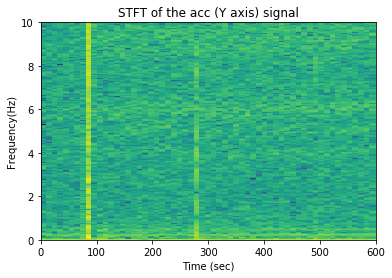

In [205]:
t=np.linspace(0,600,60) #22050 is the default librosa sample rate
f=np.linspace(0,10,1025) 
plt.pcolormesh(t,f,np.log(abs(stft_accy)))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT of the acc (Y axis) signal')

In [206]:
gyr=sleep01['gyr']
gyry=gyr[:,1]
stft_gyry=lb.core.stft(np.array(gyry), 2048, 200, 400) #window_len=20 sec, f=20Hz, #hop_length=10 sec
print(stft_gyr.shape) #so we know the shape
#can also do shape=np.shape(stft_acc)
#t=np.linspace(0,600,shape[1])
#f=np.linspace(0,2.5,b[0])

(1025, 60)


Text(0.5, 1.0, 'STFT of the gyr (Y axis) signal')

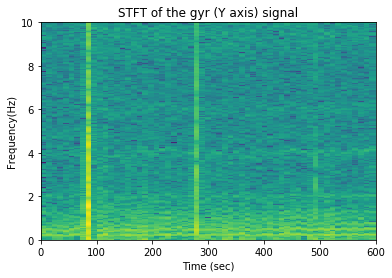

In [207]:
plt.pcolormesh(t,f,np.log(abs(stft_gyry)))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT of the gyr (Y axis) signal')

Και στις δύο παραπάνω γραφικές παραστάσεις ακόμη κι αν ο άνθρωπος κοιμάται παρατηρούνται φασματικοί τελεστές λόγω του θορύβου. 

4.2

Text(0.5, 0, 'FR(Hz)')

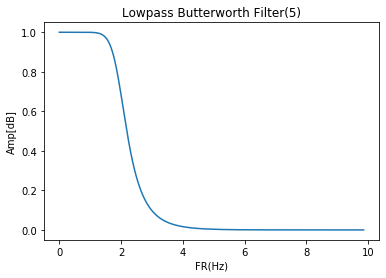

In [208]:
butter=scipy.signal.butter(5, 0.2,'low',output = 'sos')
w, A=scipy.signal.sosfreqz(butter)
n=(2*np.pi*w)/2
plt.plot(n,abs(A))
plt.title("Lowpass Butterworth Filter(5)")
plt.ylabel("Amp[dB]")
plt.xlabel("FR(Hz)")

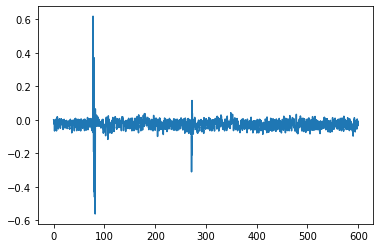

In [209]:
#we chose N=order=5. Could also use 4,6,7 (2,3 not optimal) 
butter=scipy.signal.butter(5, 0.2, 'lowpass', output='sos') #sos for general purpose filtering
accy_filtered = scipy.signal.sosfilt(butter,accy)
t=np.arange(0,len(accy)*0.05,0.05) #step=Ts=1/20
plt.plot(t,accy_filtered)

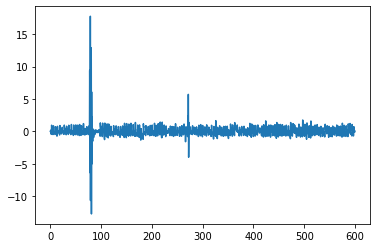

In [210]:
gyry_filtered = scipy.signal.sosfilt(butter,gyry)
t=np.arange(0,len(gyry)*0.05,0.05) #step=Ts=1/20
plt.plot(t,gyry_filtered)

In [211]:
stft_accy_filtered=lb.core.stft(np.array(accy_filtered),2048,200,400)
print(stft_accy_filtered.shape)

(1025, 60)


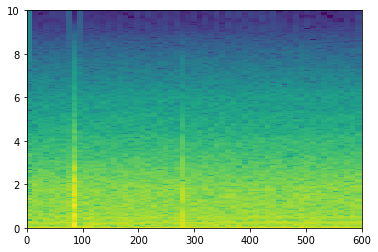

In [203]:
t=np.linspace(0,600,60)
f=np.linspace(0,10,1025)
plt.pcolormesh(t,f,np.log(abs(stft_accy_filtered)))

In [212]:
stft_gyry_filtered=lb.core.stft(np.array(gyry_filtered),2048,200,400)
print(stft_gyry_filtered.shape)

(1025, 60)


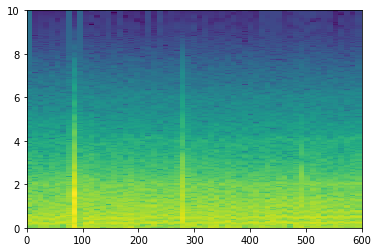

In [213]:
t=np.linspace(0,600,60)
f=np.linspace(0,10,1025)
plt.pcolormesh(t,f,np.log(abs(stft_gyry_filtered)))

Το butterworth filter εξομάλυνε το θόρυβο σε ικανοποιητικό βαθμό. Ωστόσο, οι γραφικές του STFT και των 2 σημάτων μάς πληροφορούν ότι στο διάστημα 0-2Hz υπάρχει εξασθένιση του σήματος, γεγονός που μπορεί να προκαλέσει και απώλεια χρήσιμης πληροφορίας.

4.3

In [233]:
def Wiener_Filter(signal, period):    #period -> moment person is standing still
    signal_padded=np.pad(signal,(0,8),'constant') #we will plot the acc and gyr
                                                  #so up to 8 zeros
    standing_still=signal[period:period+400] #[window,window+400] to calculate Pv
    L=400 #question suggests windows of length L=400
    N=400
    dft_standing_still=np.fft.fft(standing_still,N)
    Pv=abs(dft_standing_still**2)/N #Pv    
    window=scipy.signal.get_window("boxcar", L)
    number_of_windows=len(signal_padded)//N
    is_windowed=[]    
    for i in range(number_of_windows):
        temp=(signal_padded[i*400:(i+1)*400])*window
        is_windowed.append(temp)    #store windows in array
        
    Px=[]    
    for i in range(number_of_windows):
        temp=np.fft.fft(is_windowed[i]) #fourier transform the windows
        temp=abs(temp**2)/N          #Px
        Px.append(temp)    
        
    Pd=[]    
    for i in range(number_of_windows):
        temp = Px[i]-Pv   
        Pd.append(temp)   #Pd=Px-Pv
        
    for i in range((number_of_windows)):
        for j in range(len(Pd[i])):
            if Pd[i][j]<0:
                Pd[i][j]=0  #make every negative point of Pd equal to 0
                            #to prevent stronger spectral density
    transfer_func=[]
    for i in range(len(Pd)):
        temp=Pd[i]/(Pd[i]+Pv)   #transfer func
        transfer_func.append(temp)    
    win=np.fft.fft(is_windowed)      #Παράθυρα χωρίς επικάλυψη
    wiener=[]
    for i in range(0,len(transfer_func)):
        temp=win[i]*transfer_func[i]        #filter each window with the Wiener method
        wiener.append(temp)
        
    result=[]
    for i in range(len(wiener)):
        temp=np.fft.ifft(wiener[i]) #inverse
        result.append(temp)
        
    out_signal = np.real(np.concatenate(result)) #make it real
    
    plt.figure(figsize=(10,5))
    t_wiener=np.arange(0,len(out_signal)*0.05, 0.05)
    plt.title("Wiener Filtered")
    plt.plot(t_wiener,signal_padded,label="Original signal (Padded)")
    plt.plot(t_wiener,out_signal,label="Filtered signal")
    plt.legend()

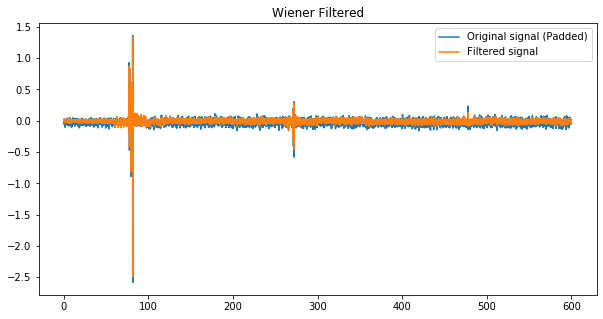

In [234]:
Wiener_Filter(accy,3000) #sleep01

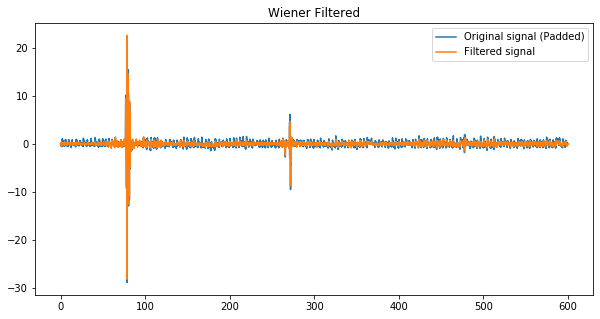

In [235]:
Wiener_Filter(gyry,3000) #sleep01

4.4

In [248]:
def Butterworth_Filter(signal): 
    butter=scipy.signal.butter(5, 0.2, 'lowpass', output='sos')
    butt_filtered_signal=scipy.signal.sosfilt(butter,signal)
    t_butter=np.arange(0,len(butt_filtered_signal)*0.05, 0.05)
    plt.figure(2,dpi = 80,figsize = (10.0, 5.0))
    plt.figure(figsize=(10,4))
    plt.plot(t_butter, signal, label="Original Signal")
    plt.plot(t_butter, butt_filtered_signal, label="Filtered Signal")
    plt.title("Butterworth Filtered")
    plt.legend()

sleep07

In [249]:
sleep07=np.load('sleep_07.npz')
acc=sleep07['acc']
accx=acc[:,0]

<Figure size 800x400 with 0 Axes>

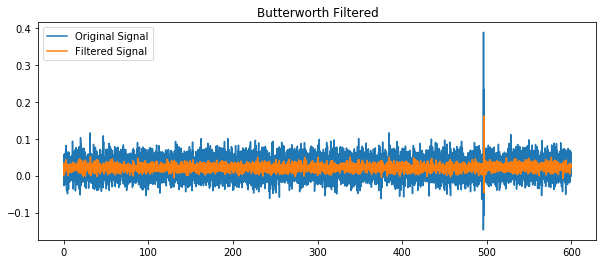

In [250]:
Butterworth_Filter(accx)  #sleep07

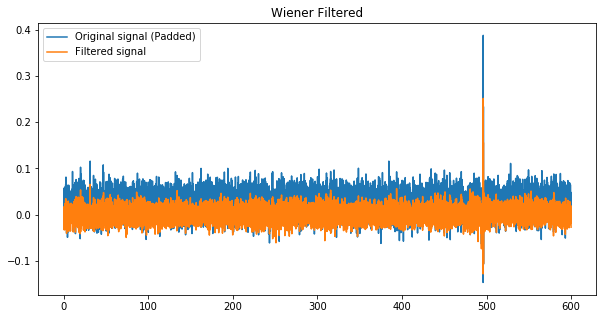

In [251]:
Wiener_Filter(accx,3000)   #sleep07

sleep13

In [252]:
sleep13=np.load('sleep_13.npz')
acc=sleep13['acc']
accx=acc[:,0]

<Figure size 800x400 with 0 Axes>

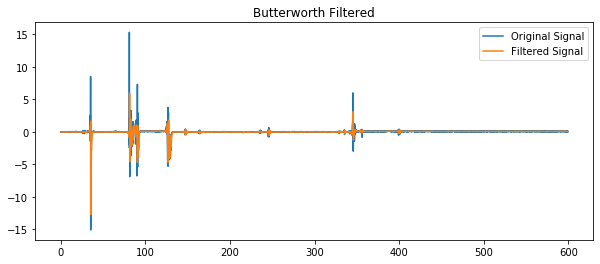

In [253]:
Butterworth_Filter(accx)  #sleep13

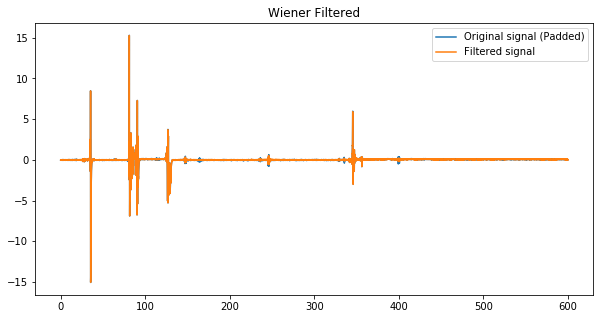

In [254]:
Wiener_Filter(accx,3000)   #sleep13

step08

In [257]:
step08=np.load('step_08.npz')
acc=step08['acc']
accx=acc[:,0]

<Figure size 800x400 with 0 Axes>

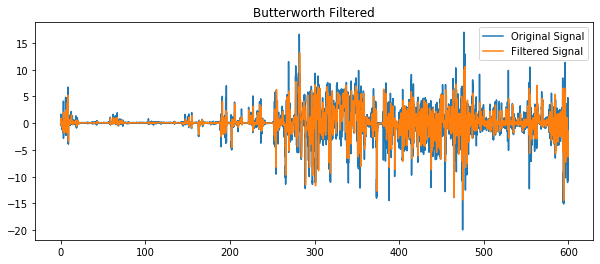

In [258]:
Butterworth_Filter(accx)  #step08

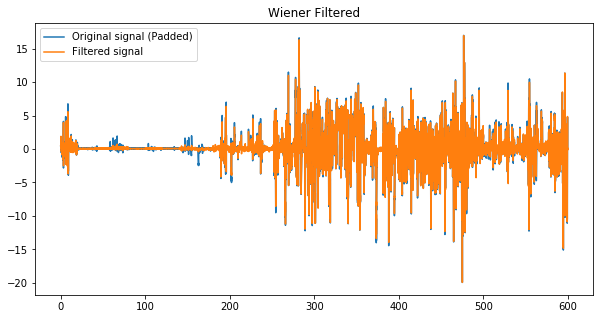

In [260]:
Wiener_Filter(accx,3000)  #step08

step11

In [261]:
step11=np.load('step_11.npz')
acc=step11['acc']
accx=acc[:,0]

<Figure size 800x400 with 0 Axes>

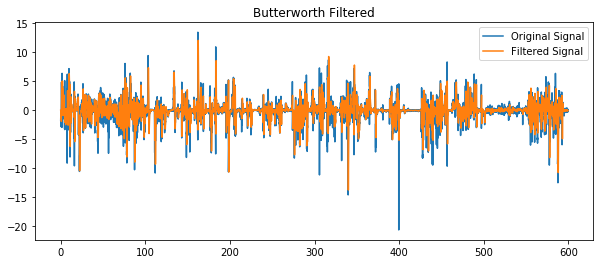

In [262]:
Butterworth_Filter(accx)  #step11

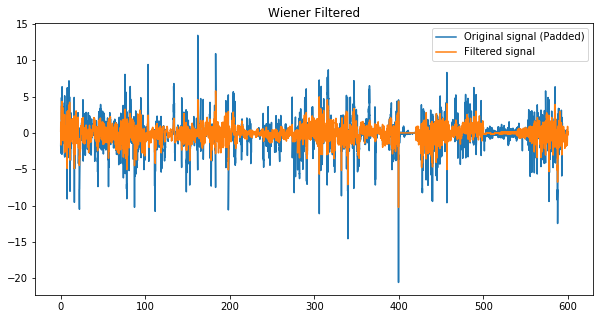

In [263]:
Wiener_Filter(accx,3000)  #step11